# Παραμετρικοί και μη-παραμετρικοί ταξινομητές, bias - variance trade-off
O Gaussian Naive Bayes είναι ένας παραμετρικός ταξινομητής. Οι παραμετρικοί ταξινομητές κάνουν κάποια υπόθεση για την κατανομή (των χαρακτηριστικών) των δεδομένων και την προσδιορίζουν μέσω παραμέτρων. Στην περίπτωση του Gaussian Naive Bayes, η υπόθεση είναι η κανονική κατανομή και οι παράμετροι είναι τα $μ$ και $σ^2$ των χαρακτηριστικών. Αντίθετα, οι μη-παραμετρικές μέθοδοι δεν κάνουν καμμία υπόθεση για την κατανομή των δεδομένων. Προσοχή: και οι μη-παραμετρικοί ταξινομητές έχουν παραμέτρους (και πάρα πολλές σε ορισμένες περιπτώσεις, τα βάρη των νευρωνικών για παράδειγμα) που επηρρεάζουν τη λειτουργία τους αλλά δεν σχετίζονται με κάποια υπόθεση κατανομής για τα δεδομένα. 

Σε γενικές γραμμές οι παραμετρικοί ταξινομητές είναι απλούστεροι, ταχύτεροι στις φάσεις train/test και χρειάζονται λιγότερα δεδομένα εκπαίδευσης. Από την άλλη, έχουν γενικά μικρότερη χωρητικότητα (capacity), δηλαδή μπορούν να διαχωρίσουν τις κλάσεις σε προβλήματα σχετικά μικρότερων διαστάσεων ενώ η απαίτηση τα πραγματικά δεδομένα να ακολουθούν μια ακριβή κατανομή είναι πολύ ισχυρή και δεν επαληθεύεται πρακτικά. Αντιστρόφως, οι μη παραμετρικοί ταξινομητές είναι πιο αργοί στην εκπαίδευση, έχουν γενικά μεγαλύτερες απαιτήσεις χώρου/μνήμης και χρειάζονται περισσότερα δεδομένα αλλά έχουν μεγαλύτερη χωρητικότητα, μπορούν να μάθουν δυσκολότερα προβλήματα και να έχουν καλύτερη απόδοση σε μεγαλύτερα datasets. 

Οι μη παραμετρικοί ταξινομητές μπορούν να εμφανίσουν επίσης εντονότερα το πρόβλημα της υπερεκπαίδευσης (overfitting), δηλαδή να προσαρμοστούν υπερβολικά στα δεδομένα εκπαίδευσης και να μειωθεί η ικανότητα γενίκευσης (generalisation) τους σε νέα δείγματα. Γενικά στη φάση της εκπαίδευσης προσπαθούμε να επιτύχουμε μια καλή ισορροπία μεταξυ της απόκλισης (bias) και της διακύμανσης (variance) από τις πραγματικές τιμές.

![Bias-Variance trade off](http://www.bogotobogo.com/python/scikit-learn/images/NeuralNetwork7-Overfitting/Overfitting.png "Bias-Variance trade off")


Ένα παράδειγμα μη-παραμετρικού ταξινομητή που θα εξετάσουμε είναι ο kNN (k-Nearest-Neighbours). 

# k Nearest Neighbors Classifier (kNN)
O kNN είναι ένας μη παραμετρικός ταξινομητής βασισμένος σε παραδείγματα (instance-based). Η αρχή λειτουργίας του είναι πολύ απλή. Για ένα νέο δείγμα προς ταξινόμηση, πρώτα υπολογίζουμε τους k πλησιέστερους γείτονές του (στον ν-διάστατο χώρο των χαρακτηριστικών εισόδου) με βάση κάποια συνάρτηση απόστασης, συνήθως ευκλείδεια
$$d(x, x') = \sqrt{\left(x_1 - x'_1 \right)^2 + \left(x_2 - x'_2 \right)^2 + \dotsc + \left(x_n - x'_n \right)^2}$$
Η κλάση του νέου δείγματος θα είναι η κλάση της πλειοψηφίας των k γειτόνων (διαλέγουμε k περιττό γενικά), είτε απλά υπολογισμένη (άθροισμα) είτε (αντίστροφα) ζυγισμένη με βάση την απόσταση του κάθε γείτονα. 

Ο kNN δεν έχει πρακτικά φάση εκπαίδευσης. Ωστόσο, για να ταξινομήσουμε ένα νέο δείγμα στην φάση test,  πρέπει να συγκρίνουμε την απόστασή του με κάθε δείγμα του train set. Αυτό σημαίνει ότι για την ταξινόμηση είναι απαραίτητα όλα τα δείγματα εκπαίδευσης (εξού και η ονομασία "instance-based", ενώ στον Naive Bayes χρειαζόμαστε μόνο τις παραμέτρους $μ$ και $σ^2$). Αυτό σημαίνει ότι ο kNN είναι πιο απαιτητικός και σε χώρο (αποθήκευση όλων των δειγμάτων) και σε χρόνο (υπολογισμός όλων των αποστάσεων για κάθε νέο δείγμα).
# Υπερπαράμετρος k
Το k της γειτονιάς του kNN είναι μια υπερπαράμετρος του ταξινομητή. Μια άλλη υπερπαράμετρος για παράδειγμα είναι η συνάρτηση της απόστασης. Οι υπερπαράμετροι είναι επιλογές που γίνονται από τον σχεδιαστή του συστήματος και δεν μπορούμε να ξέρουμε τις βέλτιστες τιμές τους αν πρώτα δεν τις αξιολογήσουμε εμπειρικά σε δεδομένα.  Ένα άλλο παράδειγμα υπερπαραμέτρου είναι ο αριθμός των κρυφών νευρώνων σε ένα MLP. Στην περίπτωση του kNN το k ελέγχει το trade-off μεταξύ μεταξύ απόκλισης και διακύμνανσης.

Έαν θέσουμε μικρό k, πχ k=1 παίρνουμε ένα ταξινομητή με υψηλή διακύμανση και χαμηλή αποκληση. Ο ταξινομητής τείνει να αγνοεί τη συνολική κατανομή και αποφασίζει μόνο από το κοντινότερο δείγμα. Στην περίπτωση k=1 το σύνορο απόφασης (decision boundary) περνά από τις μεσοκάθετους γειτονικών δειγμάτων διαφορετικής κλάσης. 
![kNN k=1](https://kevinzakka.github.io/assets/1nearestneigh.png "kNN with k=1")
Αν διαλέξουμε μεγαλύτερο k, φτιάχνουμε ένα ταξινομητή με χαμηλότερη διακύμανση και υψηλότερη απόκλιση. Θα ταξινομίσει λάθος περισσότερα αποκλίνοντα δείγματα (outliers) αλλά θα σέβεται περισσότερο τη συνολική κατανομή.
![kNN k=20](https://kevinzakka.github.io/assets/20nearestneigh.png "kNN with k=20")

# Το Iris dataset
Για να μελετήσουμε τον kNN, θα φορτώσουμε το dataset ["Iris"](https://archive.ics.uci.edu/ml/datasets/Iris). Το Iris είναι το διασημότερο dataset στο Machine Learning. Το χρησιμοποίησε πρώτος το 1936 ο διάσημος στατιστικός [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) και αποτελείται από 50 παρατηρήσεις για κάθε είδος του άνθους Iris (Iris setosa, Iris virginica και Iris versicolor). Για κάθε δείγμα μετρήθκαν 4 χαρακτηριστικά: το πλάτος και το μήκος των πετάλων και των σεπάλων.
![Iris petals & sepals](https://kevinzakka.github.io/assets/flower.jpg "Iris petals & sepals")

Σημειώστε ότι με το Iris και τρεις κατηγορίες και άρα έχουμε multiclass και όχι binary classification. Εισάγουμε το Iris στο notebook.

In [1]:
# Load Iris and organize our data
from sklearn.datasets import load_iris
data = load_iris()
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

In [2]:
# Ας τυπώσουμε τα ονόματα των χαρκτηριστικών
print feature_names

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
# Χρησιμοποιούμε τη γνωστή train_test_split για να διαχωρίσουμε σε train και test set
# το (int) όρισμα "random_state" είναι το seed της γεννήτριας τυχαίων αριθμών
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.40, random_state=78)

Διαλέγουμε τυχαία τιμή 5 για την υπερπαράμετρο k, εκπαιδεύουμε ένα kNN classifier και υπολογίζουμε την πιστότητα του στο Iris, στο προηγούμενο train/test split

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print accuracy_score(y_test, pred)

0.983333333333


# Ρύθμιση υπερπαραμέτρων με διασταυρούμενη επικύρωση (Cross Validation)
Ένας προφανής τρόπος να βρούμε τη βέλτιστη τιμή του k, να πραγματοποιήσουμε δηλαδή επικύρωση του μοντέλου, είναι ο ακόλουθος. Για k=1 μέχρι k=κάποιο n, κάνουμε fit τον ταξινομητή στο train set και μετράμε την απόδοση στο test set. Ο ταξινομητής με k που δίνει το μικρότερο σφάλμα ταξιμόνόμησης σύμφωνα με κάποιο κριτήριο (εδώ η πιστότητα) στο test set θα είναι ο βέλτιστος. Όμως, αν ακολουθήσουμε αυτή τη στρατηγική, ουσιαστικά κάνουμε υπερεκπαίδευση, καθώς χρησιμοποιούμε το test set ως training set, δηλαδή βελτιστοποιούμε κάποιο κριτήριο σφάλματος πάνω στο test set. Αυτό μπορεί να είναι επιβλαβές για την ικανότητα γενίκευσης του ταξινομητή: το test set χρησιμεύει μόνο για την τελική εκτίμηση της απόδοσης του ταξινομητή.

Για να ακολουθήσουμε σωστά το πρωτόκολλο, αυτό που πρέπει να κάνουμε είναι να χρησιμοποιήσουμε μόνο το πραγματικό training set για να διαλέξουμε τις βέλτιστες υπερπαραμέτρους. Θα μπορούσαμε να κρατήσουμε ένα ποσοστό δειγμάτων ως σύνολο επικύρωσης (validation set πχ άλλο ένα 1/3) του training set και να ακολουθήσουμε την προηγούμενη διαδικασία: εκπαίδευση στο 1/3 training set, επικύρωση σε 1/3 και τελικά αξιολόγηση στο 1/3 data set. Ωστόσο αυτή η μεθοδολογία "αχρηστεύει" μεγάλο μέρος του dataset (τα 2/3) ως προς την εκπαίδευση του ταξινομητή. Πρακτικά λοιπόν, προτιμούμε να χρησιμοποιούμε τη μέθοδο της διασταυρούμενης επικύρωσης (Cross Validation).

Στο Cross Validation αρχικά χωρίζουμε το training set σε έναν αριθμό "πτυχών" (folds). Συνηθισμένες τιμές είναι το 5 και το 10 (5-fold και 10-fold CV). Στη συνέχεια, για κάθε k-fold (άσχετο από το k του kNN), θεωρούμε ότι τα k μείον 1 folds είναι training set και ότι το fold που αφήσαμε έξω είναι το test set. Υπολογίζουμε τη μετρική σφάλματός μας στο test set που ορίζει το fold. Επαναλαμβάνουμε τη διαδικασία για τα k folds για κάθε τιμή των υπερπαραμέτρων και υπολογίζουμε τη μέση τιμή της μετρικής του σφάλματος. Με αυτό τον τρόπο, αφενός είμαστε αμερόληπτοι στην αξιολόγηση αφήνοντας τελείως έξω το test set και αφετέρου χρησιμοποιούμε αποτελεσματικά τα δεδομένα εκπαίδευσης: τα χρησιμοποιούμε όλα και παίρνοντας τη μέση τιμή εξαλείφουμε πιθανές ανωμαλίες στα δεδομένα.

![Cross validation](https://sebastianraschka.com/images/faq/evaluate-a-model/k-fold.png "Cross Validation")

To Scikit Learn έχει συναρτήσεις για να κάνει αυτόματα cross validation (να ορίζει folds και να  υπολογίζει τιμές και μέσους όρους). Θα κάνουμε 5 fold cross validation για να υπολογίσουμε το βέλτιστο k του kNN στο Iris.

In [5]:
from sklearn.model_selection import cross_val_score
# φτιάχνουμε μια λίστα από το 1 έως το 50
myList = list(range(1,50))
# Κρατάμε μόνο τα περιττά k
neighbors = filter(lambda x: x % 2 != 0, myList)
# empty list that will hold cv scores
cv_scores = []
# perform 5-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

Θα τυπώσουμε την τιμή του σφάλματος σε γραφική παράσταση ως συνάρτηση του k για το training set, και την τιμή της πιστότητας στο test set για το βέλτιστο k (υπολογισμένο στο training set)

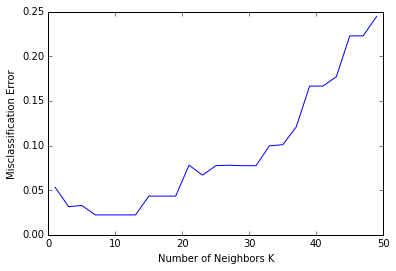

The optimal number of neighbors (calculated in the training set) is 7

Optimal accuracy on the test set is 0.966666666667 with k= 7


In [6]:
# Κάνουμε import την matplotplib
import matplotlib.pyplot as plt

# το σφάλμα είναι το αντίστροφο της πιστότητας
MSE = [1 - x for x in cv_scores]

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print "The optimal number of neighbors (calculated in the training set) is %d" % optimal_k

# για το optimal k παίρνουμε και τα αποτέλεσματα στο test set
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print "\nOptimal accuracy on the test set is", accuracy_score(y_test, pred), "with k=", optimal_k

# Αξιολόγηση ταξινόμησης με ακρίβεια, ανάκληση και F1, μέσοι όροι
Η πιστότητα είναι μια πολύ χρήσιμη και πρακτική μετρική της απόδοσης ενός ταξινομητή. Ωστόσο, δεν αρκεί για μια ολκοληρωμένη μελέτη της απόδοσής του. Είναι τυπικό για όλα τα προβλήματα machine learning να χρησιμοποιούμε διαφορετικές μετρικές για να μελετήσουμε τις ιδιότητες των δεδομένων. Η βάση για τις μετρικές απόδοσης των ταξινομητών είναι ο πίνακας σύγχυσης (confustion matrix). O πίνακας σύχγησης $C$  είναι τέτοιος ώστε το $C_{i, j}$ είναι ίσο με τα δείγματα που ενώ ανήκουν στην κατηγορία $i$ ταξινομήθηκαν στην κατηγορία  $j$. Για το Iris, στο συγκεκριμένο train/test split, o πίνακας σύγχυσης είναι:

In [7]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
print label_names, "\n"
print cnf_matrix

['setosa' 'versicolor' 'virginica'] 

[[20  0  0]
 [ 0 21  2]
 [ 0  0 17]]


που σημαίνει ότι 2 δείγματα που άνηκαν κανονικά στο είδος versicolor ταξινομήθηκαν λανθασμένα στο είδος virginica. Τα στοιχεία της διαγωνίου είναι αληθινά θετικά δείγματα (true positive) της κάθε κλάσης. Για κάθε κλάση $i$ τα στοιχεία της γραμμής $i$ εκτός της διαγωνίου είναι λάνθασμένα αρνητικά δείγματα (false negative) της κλάσης και τα στοιχεία της κολώνας $i$ εκτός της διαγωνίου είναι λανθασμένα θετικά δείγματα (false positive) της κλάσης. 

Σε περίπτωση δυαδικού ταξινομητή $C_{0,0}$ είναι τα αληθινά αρνητικά δείγματα (true negative, η κλάση 0 θεωρείται η αρνητική), $C_{1,0}$ είναι τα λανθασμένα αρνητικά δείγματα, $C_{1,1}$ τα αληθινά θετικά δείγματα και $C_{0,1}$ τα λανθασμένα θετικά. Για παράδειγμα:

In [8]:
# παράδειγμα confusion matrix σε δυαδική ταξινόμηση
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print (tn, fp, fn, tp)

(0, 2, 1, 1)


Συχνά στην δυαδική ταξινόμηση θεωρούμε θετική την πιο σπάνια κλάση ή το φαινόμενο προς εντοπισμό (πχ διαβητικός). 

Ορίζουμε:
Ακρίβεια -Precision- ($P$) είναι ο λόγος των true positives ($T_p$) ως προς τον αριθμό των true positives συν τον αριθμό των false positives ($F_p$).
$$P = \frac{T_p}{T_p+F_p}$$
Ανάκληση -Recall- ($R$) είναι ο λόγος των true positives ($T_p$) ως προς τον αριθμό των true positives συν τον αριθμό των false negatives ($F_n$).
$$R = \frac{T_p}{T_p + F_n}$$
Συχνά χρησιμοποιούμε και το ($F_1$) score, το οποίο είναι ο αρμονικός μέσος της ακρίβειας και της ανάκλησης.
$$F1 = 2\frac{P \times R}{P+R}$$
Ιδανικά θέλουμε και υψηλή ακρίβεια και υψηλή ανάκληση, ωστόσο μεταξύ της ακρίβειας και της ανάκλησης υπάρχει γενικά trade-off. Στην οριακή περίπτωση του ταξινομητή που επιστρέφει σταθερά μόνο τη θετική κλάση, η ανάκληση θα είναι 1 ($F_n=0$) αλλά η ακρίβεια θα έχει τη μικρότερη δυνατή τιμή της. Γενικά, κατεβάζοντας το κατώφλι της απόφασης του ταξινομητή, αυξάνουμε την ανάκληση και μειώνουμε την ακρίβεια και αντιστρόφως.

Στην πράξη και ειδικά σε μη ισορροπημένα datasets χρησιμοποιούμε την ακρίβεια, ανάκληση και το F1 πιο συχνά από την πιστότητα. 

In [9]:
from sklearn.metrics import precision_recall_fscore_support
# εκτυπώνουμε 4 πίνακες, precision, recall και F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
print precision_recall_fscore_support(y_test, pred, average=None), "\n"
# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρόντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
print precision_recall_fscore_support(y_test, pred, average='macro'), "\n"
# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro). Precision, recall και F1 είναι εδώ 58/60 
print precision_recall_fscore_support(y_test, pred, average='micro'), "\n"
# η classification_report τυπώνει πιο ωραία οπτικά σε string τα αποτελέσματα
from sklearn.metrics import classification_report
print classification_report(y_test, pred, target_names=label_names)
# o μέσος όρος εδώ είναι υπολογισμένος ως "weighted" και όχι "macro" δηλαδή η τιμή κάθε κλα΄σης μετρά στο μέσο όρο ανάλογα με το support της.

(array([ 1.        ,  1.        ,  0.89473684]), array([ 1.        ,  0.91304348,  1.        ]), array([ 1.        ,  0.95454545,  0.94444444]), array([20, 23, 17])) 

(0.96491228070175439, 0.97101449275362317, 0.96632996632996626, None) 

(0.96666666666666667, 0.96666666666666667, 0.96666666666666667, None) 

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        20
 versicolor       1.00      0.91      0.95        23
  virginica       0.89      1.00      0.94        17

avg / total       0.97      0.97      0.97        60

